In [396]:
import metric_learn
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_mldata
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold
import sklearn.feature_selection
import sklearn.linear_model

import matplotlib.pyplot as plt

from scipy.sparse.csgraph import laplacian

In [279]:
leukemia = fetch_mldata('leukemia')

In [480]:
X = leukemia.data
y = leukemia.target

print X.shape

X = sklearn.feature_selection.SelectFdr(alpha=0.1).fit_transform(X, y=y)
# X = X[:,:100]
print X.shape

(72, 7129)
(72, 1342)


In [481]:
X = X[np.argsort(y)]
y = y[np.argsort(y)]

In [498]:
# clf = SVC(C=1e1, kernel="linear", class_weight="balanced")
clf = sklearn.linear_model.LogisticRegression(C=1e-1, penalty='l1', fit_intercept=False, class_weight="balanced")

# K-fold cross-validation accuracy score

In [515]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
acc_scores = []
for train, test in kf.split(X=X, y=y):
    clf.fit(X[train], y[train])
    acc_scores.append(metrics.accuracy_score(y[test], clf.predict(X[test])))
print "acc\t", np.average(acc_scores)
print "nonzero\t", len(np.nonzero(clf.coef_)[0])

acc	0.930476190476
nonzero	11


In [500]:
clf.coef_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

# Try metric learning

In [484]:
sdml = metric_learn.sdml.SDML(balance_param=0.9, sparsity_param=0.5, use_cov=False, verbose=True)

In [485]:
def connectivy_matrix(y):
    W = np.zeros((len(y), len(y)))
    for i in range(len(y)):
        for j in range(len(y)):
            if i != j:
                if y[i] == y[j]:
                    W[i,j] = 1
                elif y[i] != y[j]:
                    W[i,j] = -1
    return W

W = connectivy_matrix(y)
sdml.fit(X=X, W=W)

[graph_lasso] Iteration   0, cost  6.20e+03, dual gap -2.274e-13


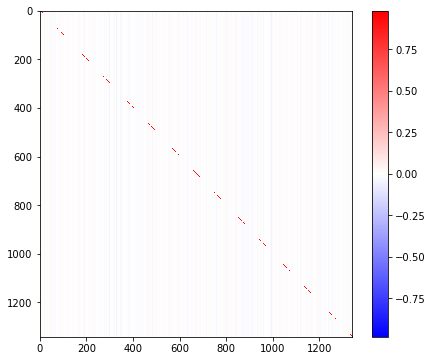

In [576]:
data = sdml.metric()

plt.figure(figsize=(7,6))
cmap = "bwr"
vminmax = max(np.abs(np.min(data)), np.abs(np.max(data)))
img2 = plt.imshow(data+data2, aspect='auto', interpolation="nearest", cmap=cmap, vmin=-vminmax, vmax=vminmax)
# plt.plot(clf.coef_)
plt.colorbar(img2, cmap=cmap)
plt.show()

In [495]:
np.sum(np.diag(sdml.metric()) > 0.95)

637

In [513]:
clf.coef_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])